In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [9]:
#Step 1:Load the Date
import ssl
import certifi
ssl._create_default_https_context = ssl._create_unverified_context

california=fetch_california_housing()
df=pd.DataFrame(california.data,columns=california.feature_names)
df['Price']=california.target
print("Dataset\n",df.head())


Dataset
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [10]:
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [ ]:
x=df.drop('Price',axis=1)

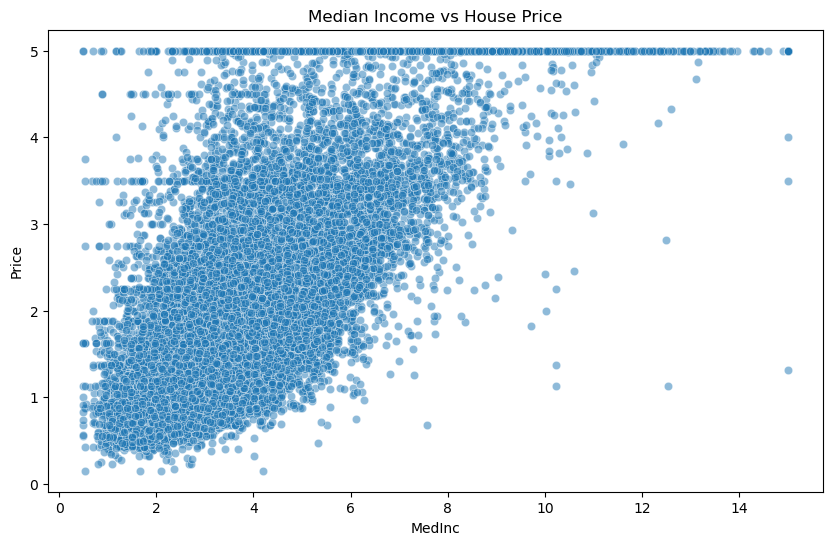

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='MedInc',y='Price',data=df,alpha=0.5)
plt.title("Median Income vs House Price")
plt.show()

In [14]:
print('Correlation with price:\n',df.corr()['Price'].sort_values())

Correlation with price:
 Latitude     -0.144160
AveBedrms    -0.046701
Longitude    -0.045967
Population   -0.024650
AveOccup     -0.023737
HouseAge      0.105623
AveRooms      0.151948
MedInc        0.688075
Price         1.000000
Name: Price, dtype: float64


In [15]:
corr_matrix=df.corr()

<Axes: >

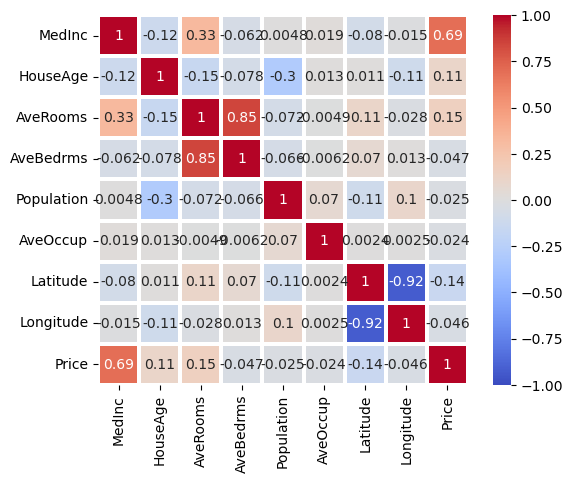

In [18]:
sns.heatmap(corr_matrix,
            annot=True, #show numbers in order
            cmap="coolwarm", #color scheme(red=positive,blue=negative)
            vmin=-1,vmax=1,  #Range of correlation values
            center=0,square=True, #center colormap at 0,unifrom squares
            linewidths=1.5) #lines between squares

In [25]:
X=df[['MedInc']]
y=df['Price']


In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
model=LinearRegression()

In [28]:
model.fit(X_train,y_train)

LinearRegression()

In [29]:
y_pred=model.predict(X_test)

In [30]:
c = model.intercept_
m = model.coef_[0]
 
print(m)

print(c)

print(f"Equation of the line : y={m:.2f}x+{c:.2f}")

0.4193384939381273
0.4445972916907872
Equation of the line : y=0.42x+0.44


In [31]:
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)

In [34]:
print(f"MAE : {mae:.2f} $100k")
print(f"RMSE : {rmse:.2f} $100k")
print(f"R-square : {r2:.2f} ")

MAE : 0.63 $100k
RMSE : 0.84 $100k
R-square : 0.46 


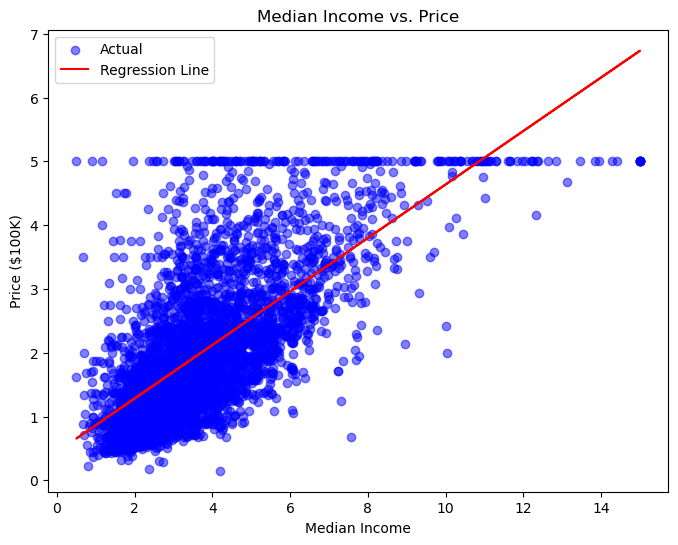

In [36]:
plt.figure(figsize=(8, 6))  # Set figure size

# Plot actual data points (scatter plot)
plt.scatter(X_test, y_test, color='BLUE', label='Actual', alpha=0.5)

# Plot regression line (predicted values)
plt.plot(X_test, y_pred, color='red', label='Regression Line')

# Add title and labels
plt.title('Median Income vs. Price')
plt.xlabel('Median Income')
plt.ylabel('Price ($100K)')

# Display the legend
plt.legend()

# Show the plot
plt.show()